In [1]:
from skimage import io, color, img_as_ubyte, util
import numpy as np
import cv2

Funkcja isIn sprawdza czy dane wspolrzedne i,j mieszczą się w tablicy(image)

In [2]:


def isIn(i,j,image):
    return i >= 0 and i < image.shape[0] and j >=0 and j < image.shape[1]



Funkcja bfs indeksuje wszystkie piksele należącę do danego obiektu, i,j to pierwszy napotkany punkt obrazu

In [3]:
def bfs(i,j,image,color):
    q = [(i,j)]
    while q:
        ii,jj = q.pop(0)
        for dx in range(-1,2):
            for dy in range(-1,2):
                if dx == 0 and dy == 0:
                    continue
                a = ii + dx
                b = jj + dy
                if isIn(a,b,image) and image[a][b] == 0:
                    image[a][b] = color
                    q.append((a,b))


Funckja getImage pobiera obraz z danej lokalizacji url

In [4]:

def getImage(url):
    p = io.imread(url)
    p = color.rgb2gray(p)
    p = img_as_ubyte(p) 
    p = util.invert(p)
    return p



Funkcja searchObjects przeszukuje obraz i dla kazdego znalezionego piksela o wartosci 0 wywoluje przeszukiwanie wszerz (funckja bfs)

In [5]:
def searchObjects(image,start = 10,step = 90):
    cnt = start
    x = 0
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            v = image[i][j]
            if v == 0:
                x += 1
                image[i][j] = cnt
                bfs(i,j,image,cnt)
                cnt += step
    return x,image

In [6]:
import warnings
warnings.filterwarnings('ignore')

p = getImage('pattern1.png')

th = 150
th, bim = cv2.threshold(p, thresh=th, maxval=255, type=cv2.THRESH_BINARY_INV)

In [7]:
cnt,indexed_image = searchObjects(bim)

In [8]:
print('found {} objects'.format(cnt))

found 3 objects


In [9]:
from skimage import data

def show2imgs(im1, im2, title1='Obraz pierwszy', title2='Obraz drugi', size=(20,20)):
    
    import matplotlib.pyplot as plt
    
    _, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(im1, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(im2, cmap='gray')
    ax2.axis('off')
    ax2.set_title(title2)
    plt.show()

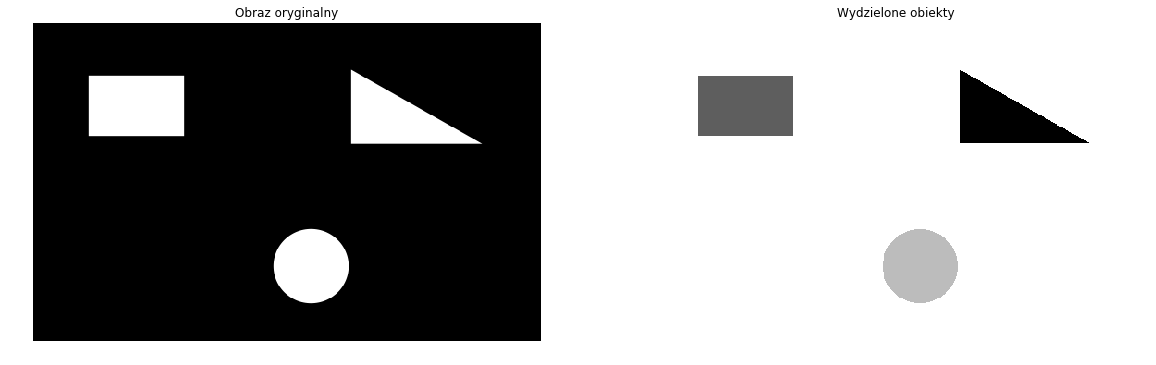

In [10]:
show2imgs(getImage('pattern1.png'), indexed_image,"Obraz oryginalny","Wydzielone obiekty")